In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [3]:
! git clone https://github.com/AllaVyjayanthi/Plant-Disease-Detection-ML

Cloning into 'Plant-Disease-Detection-ML'...
remote: Enumerating objects: 1552, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1552 (delta 0), reused 0 (delta 0), pack-reused 1549
Receiving objects: 100% (1552/1552), 1.31 GiB | 27.89 MiB/s, done.
Updating files: 100% (1536/1536), done.


In [6]:
path = "/content/Plant-Disease-Detection-ML/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [7]:
path = "/content/Plant-Disease-Detection-ML/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [8]:
path = "/content/Plant-Disease-Detection-ML/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [9]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [10]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


## Data Preprocessing

In [11]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[111.79297  165.79297   87.79297 ]
  [112.26367  164.26367   89.26367 ]
  [107.90625  162.90625   81.90625 ]
  ...
  [129.7207   182.7207   130.7207  ]
  [133.54492  186.54492  132.54492 ]
  [125.73047  179.73047  121.73047 ]]

 [[108.46484  163.20117   82.77734 ]
  [105.26953  163.2168    79.228516]
  [104.75     161.0625    74.0625  ]
  ...
  [125.66211  178.19336  126.66211 ]
  [123.4668   176.1543   121.8418  ]
  [127.75195  181.2832   123.43945 ]]

 [[110.15234  165.15234   82.15234 ]
  [105.48047  163.48047   78.48047 ]
  [103.259766 162.25977   70.259766]
  ...
  [107.73828  157.73828  108.73828 ]
  [117.58203  168.58203  112.58203 ]
  [129.43555  180.43555  123.43555 ]]

 ...

 [[ 70.33203  119.33203   64.01953 ]
  [ 58.84961  109.84961   53.84961 ]
  [ 64.55078  103.81055   56.03125 ]
  ...
  [ 40.416016  97.416016  28.416016]
  [ 48.73633  105.73633   36.73633 ]
  [ 49.220703 106.9082    33.845703]]

 [[ 55.83789  110.52539   55.36914 ]
  [ 66.16211  114.609375  

## Train Image Data

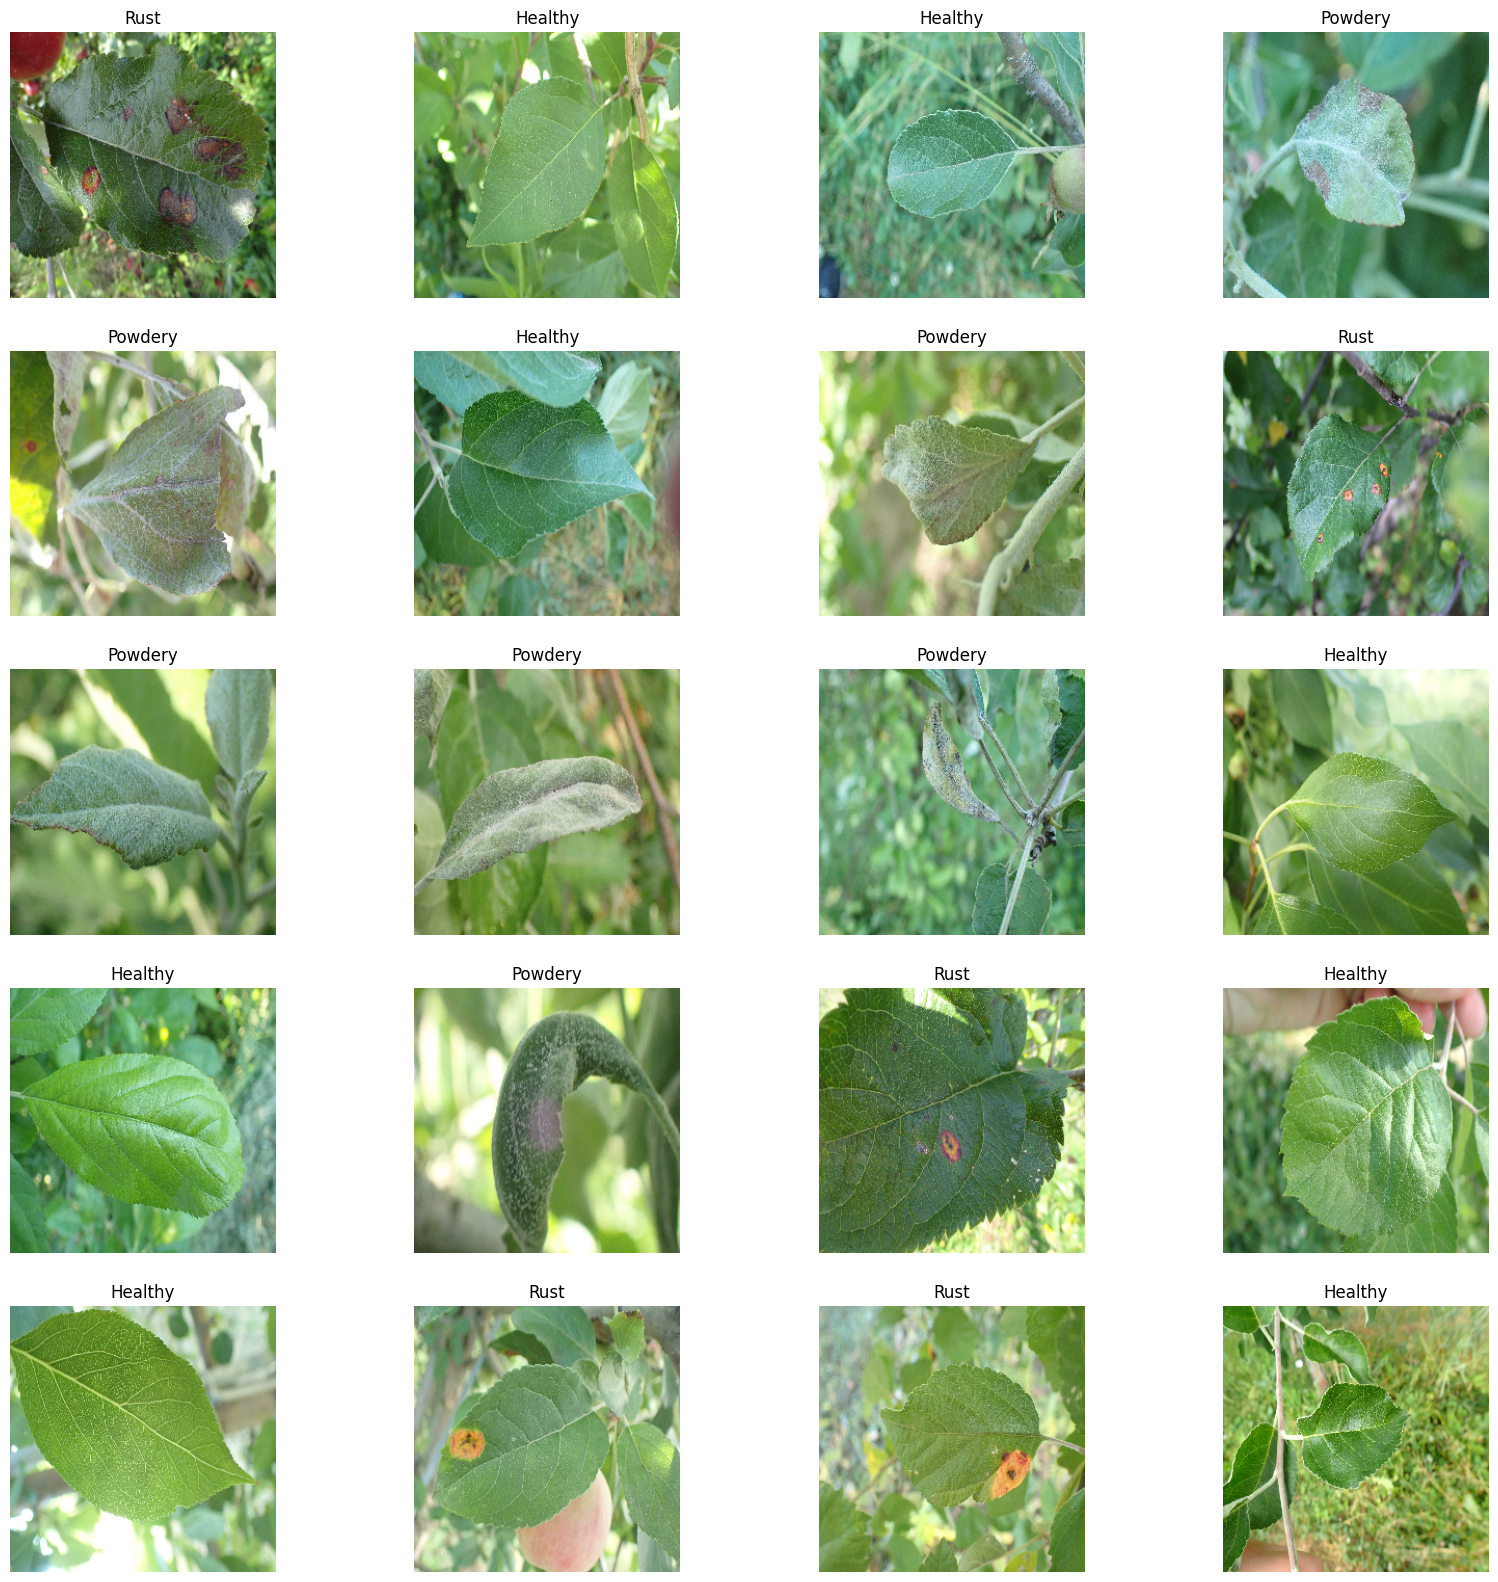

In [12]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [13]:
import tensorflow as tf

# Define constants
IMAGE_SIZE = 256
CHANNELS = 3

# Define the input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Create the rescaling layer
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255.0)  # Rescale pixel values to [0, 1]
])

# Define data augmentation (optional, add as needed)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2)
])

# Build the model
model = tf.keras.models.Sequential([
    resizing_and_rescaling,
    data_augmentation,

    # Convolution layer 1
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Convolution layer 2
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Convolution layer 3
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Convolution layer 4
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Flatten Layers
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




## Data Augmentation

In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomRotation(0.2)
])

## Creat CNN Model

In [15]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 4
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)


In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (32, 127, 127, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [17]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 [==============================] - 353s 8s/step - loss: 1.0960 - accuracy: 0.3805 - val_loss: 1.2164 - val_accuracy: 0.3667
Epoch 2/10
42/42 [==============================] - 346s 8s/step - loss: 0.8661 - accuracy: 0.5696 - val_loss: 0.7946 - val_accuracy: 0.6167
Epoch 3/10
42/42 [==============================] - 361s 8s/step - loss: 0.7265 - accuracy: 0.6362 - val_loss: 0.8484 - val_accuracy: 0.5333
Epoch 4/10
42/42 [==============================] - 354s 8s/step - loss: 0.6690 - accuracy: 0.6959 - val_loss: 0.6441 - val_accuracy: 0.7167
Epoch 5/10
42/42 [==============================] - 365s 8s/step - loss: 0.4464 - accuracy: 0.8585 - val_loss: 0.4218 - val_accuracy: 0.8667
Epoch 6/10
42/42 [==============================] - 354s 8s/step - loss: 0.4048 - accuracy: 0.8684 - val_loss: 0.3819 - val_accuracy: 0.8667
Epoch 7/10
42/42 [==============================] - 346s 8s/step - loss: 0.3001 - accuracy: 0.9024 - val_loss: 0.3430 - val_accuracy: 0.9000
Epoch 8/10
42

## Accuracy and loss on Train and Test

In [19]:
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 [==============================] - 131s 3s/step - loss: 0.1416 - accuracy: 0.9470
Loss on Train data: 0.14160820841789246
Accuracy on Train data: 0.9470499157905579
5/5 [==============================] - 15s 2s/step - loss: 0.2613 - accuracy: 0.9333
Loss on Test data: 0.2613319754600525
Accuracy on Test data: 0.9333333373069763


In [20]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

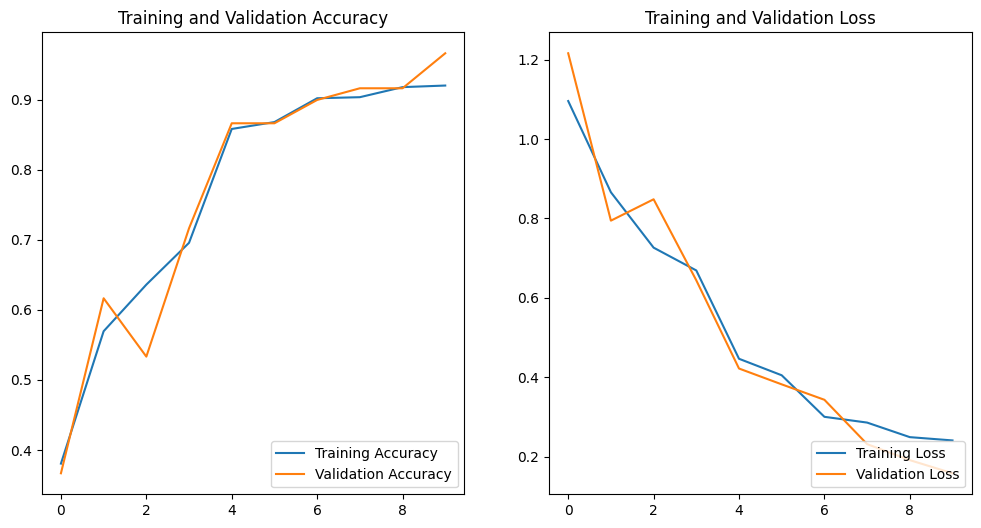

In [21]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Predictions on Test Data

In [22]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

1/1 [==============================] - 0s 109ms/step


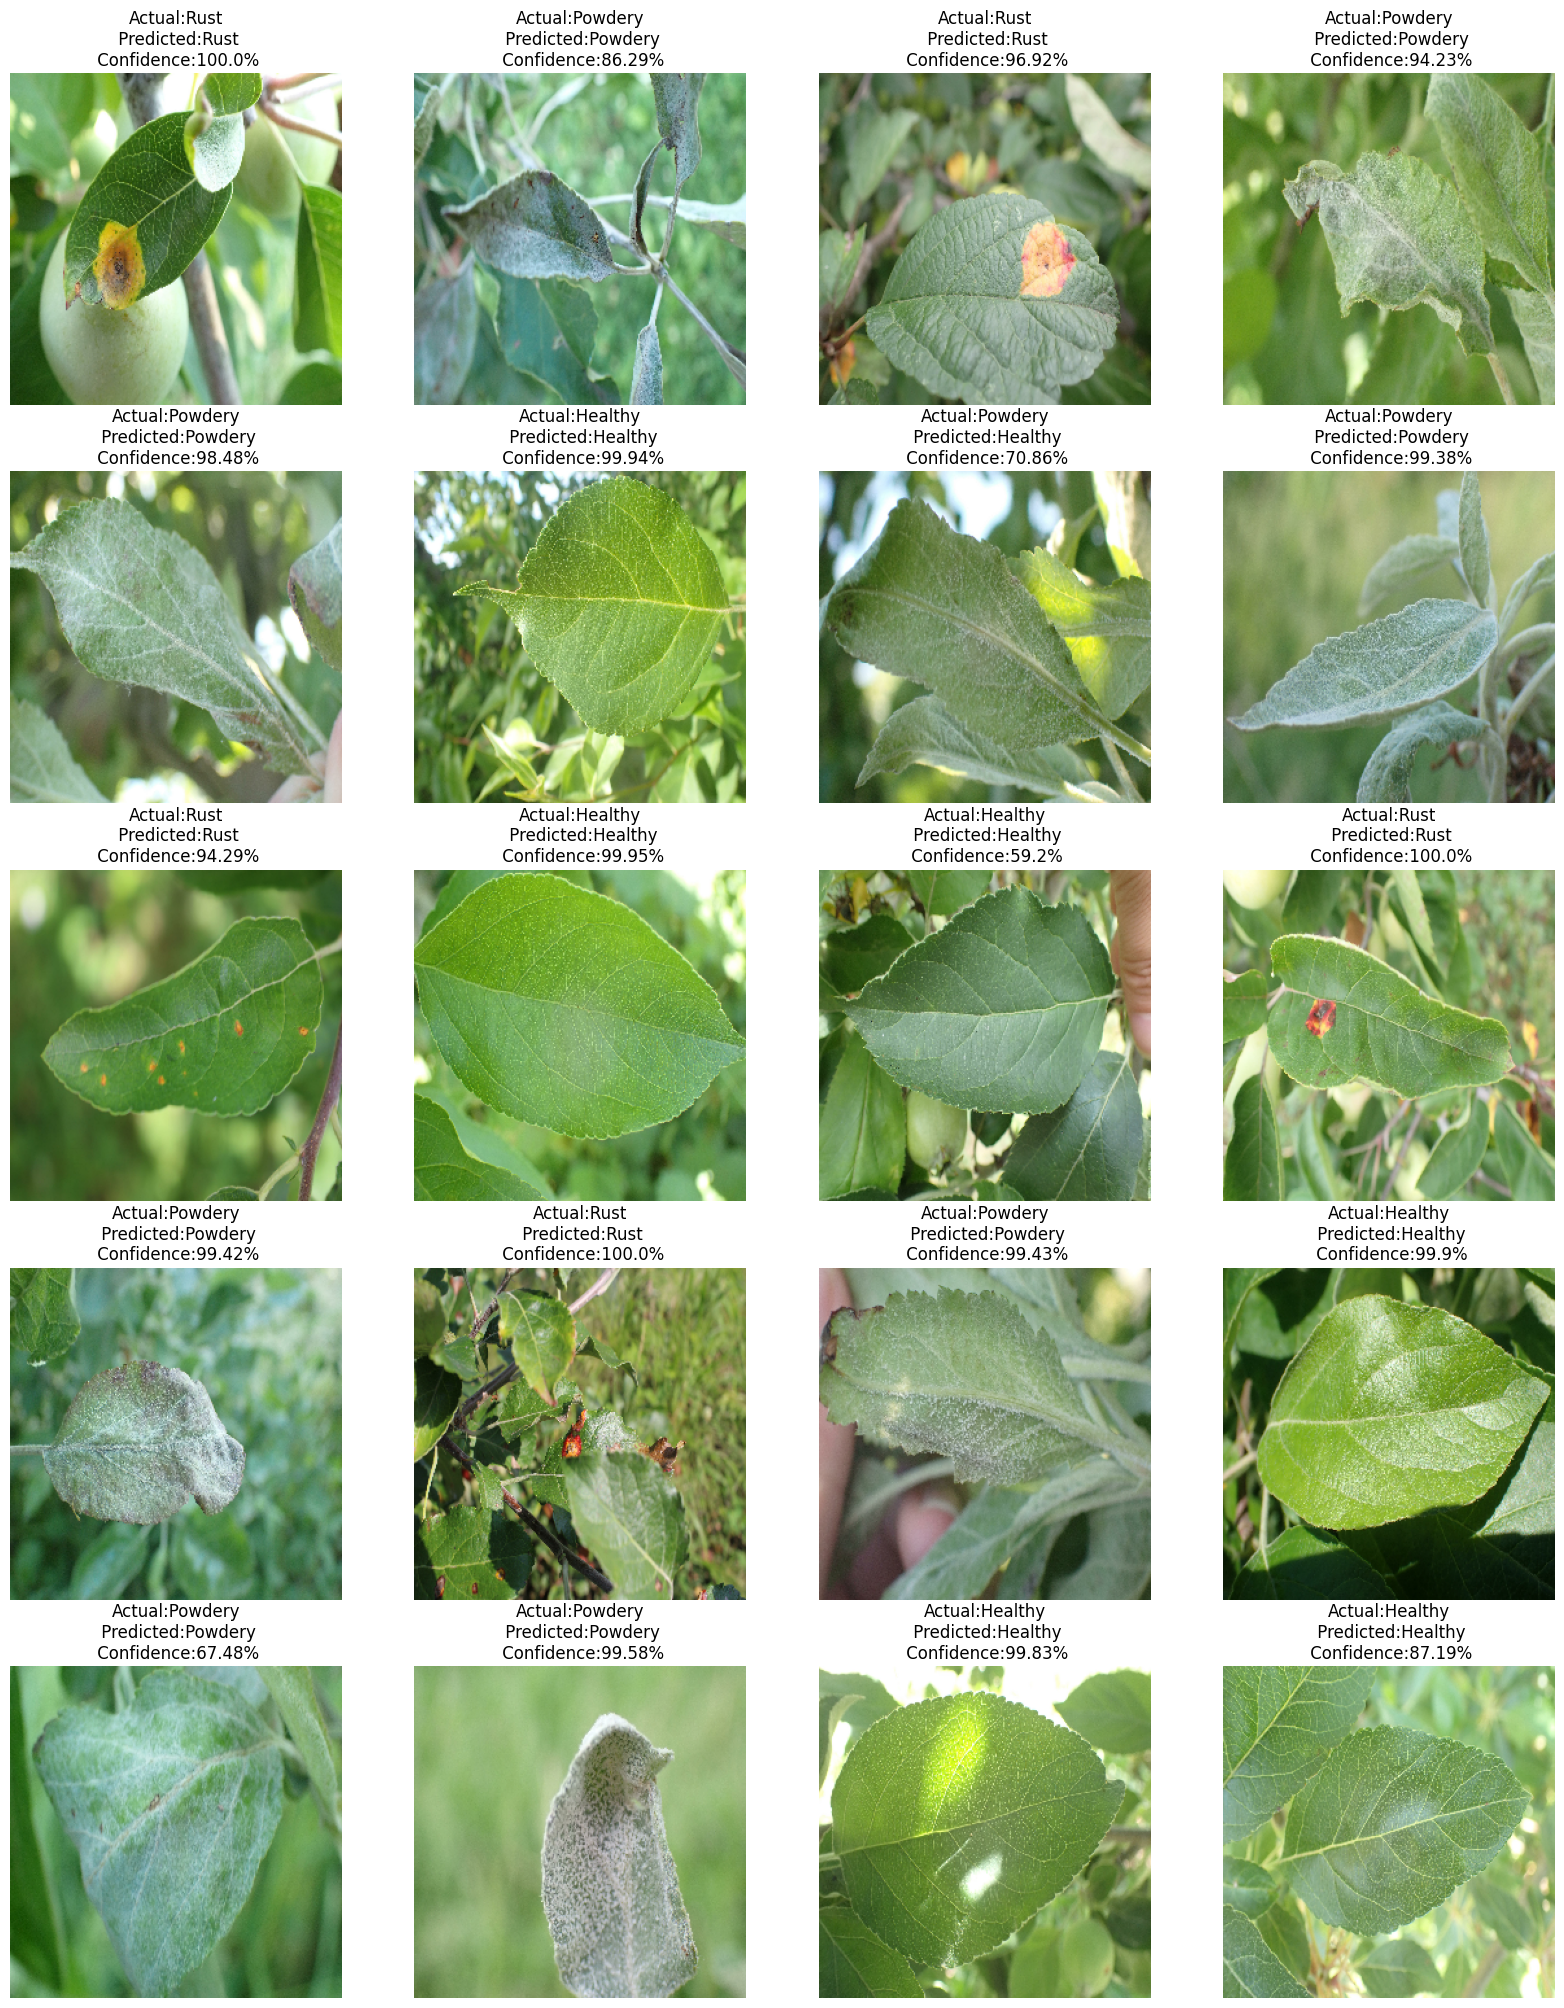

In [23]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

In [24]:
import pickle

print("saving model..")

# Assuming `model` is your trained model and you want to save it
with open('cnn_model.keras', 'wb') as file:
    pickle.dump(model, file)


saving model..


In [25]:
! pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [26]:
!wget -q -O - ipv4.icanhazip.com

104.196.112.57


In [27]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
! streamlit run predictV2.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.112.57:8501

your url is: https://fancy-bobcats-feel.loca.lt
2024-07-31 10:42:05.048361: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 10:42:05.048460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 10:42:05.053903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 10:42:07.120991: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [===========